In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preActivation:np.ndarray)->np.ndarray:
  return preActivation.clip(0.0)

- The `np.matmul` function is used for matrix multiplication, essential for performing the linear transformations.

In [3]:
a = np.array(
    [
        [1,0],
        [0,1]
    ]
)
b = np.array(
    [
        [4,1],
        [2,2]
    ]
)
c = np.matmul(a,b)
print(f"Matrix Multiplication:\n{c}")

Matrix Multiplication:
[[4 1]
 [2 2]]


In [75]:
# Define a shallow neural network
# The parameters beta_0, omega_0, beta_1, and omega_1 are the weights and biases of the network.
# This function defines a shallow neural network with one hidden layer.
# The network takes an input x and passes it through a linear transformation followed by a ReLU activation to produce the hidden layer's activations (h1).
# Another linear transformation is applied to "h1" to produce the output "y".
def ShallowNN(sample:np.ndarray,beta_0:np.ndarray,omega_0:np.ndarray,beta_1:np.ndarray,omega_1:np.ndarray)->np.ndarray:
  dataSize = sample.size
  sample = np.reshape(sample,(1,dataSize))
  hidden_1 = ReLU(np.matmul(beta_0,np.ones((1,dataSize)))+np.matmul(omega_0,sample))
  output = np.matmul(beta_1,np.ones((1,dataSize)))+np.matmul(omega_1,hidden_1)
  return output

In [5]:
def GetParameters():
  beta_0 = np.zeros((3,1))
  omega_0 = np.zeros((3,1))
  beta_1 = np.zeros((1,1))
  omega_1 = np.zeros((1,3))
  print(f"Shape of beta-0: {beta_0.shape}")
  print(f"Shape of beta-1: {beta_1.shape}")
  print(f"Shape of omega-0: {omega_0.shape}")
  print(f"Shape of omega-1: {omega_1.shape}")
  beta_0[0,0] = 0.3
  beta_0[1,0] = -1.0
  beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0
  omega_0[1,0] = 1.8
  omega_0[2,0] = 0.66
  beta_1[0,0] = 0.1
  omega_1[0,0] = -2.0
  omega_1[0,1] = -1.0
  omega_1[0,2] = 7.0
  return beta_0,omega_0,beta_1,omega_1

**Linear Univariate Regression**:

he simplest and most common form of univariate regression is linear regression, where the relationship between the independent variable (x) and the dependent variable (y) is assumed to be linear. The model can be represented by the equation:

$$y = \beta_0 + \beta_1 \cdot x + \epsilon$$

- $y$: the dependent variable
- $x$: the independent variable
- $\beta_0$: the y-intercept of the regression line, representing the predicted value of $y$ when $x$ is 0
- $\beta_1$: the slope of the regression line, representing the change in $y$ for a one-unit change in $x$
- $\epsilon$: the error term, accounting for the difference between the observed and predicted values of $y$

Univariate regression is widely used in various fields for tasks such as:

- **Trend analysis**: Understanding how a variable changes over time.
- **Forecasting**: Predicting future values of a variable based on past trends.
- **Impact assessment**: Evaluating the effect of changes in the independent variable on the dependent variable.

- The purpose of `np.squeeze` is to remove single-dimensional entries from the shape of an array. It makes an array with potentially many dimensions more compact by removing axes that have a length of one.

In [6]:
x = np.array([[[0],[1],[2]]])
print(f"Example data shape: {x.shape}")
squeezeX = np.squeeze(x)
print(f"Applied squeezed shape: {squeezeX.shape}")
print(f"Output:\n{squeezeX}")

Example data shape: (1, 3, 1)
Applied squeezed shape: (3,)
Output:
[0 1 2]


In [7]:
def PlotUnivariateRegression(xModel,yModel,xData:None=None,yData:None=None,sigmaModel:None=None,title:None=None):
  xModel = np.squeeze(xModel)
  yModel = np.squeeze(yModel)
  figure,axs = plt.subplots(figsize=(8,8))
  axs.plot(xModel,yModel)
  if sigmaModel is not None:
    axs.fill_between(xModel,yModel-2*sigmaModel,yModel+2*sigmaModel,color="green")
  axs.set_xlabel("Input, x")
  axs.set_ylabel("Output y")
  axs.set_xlim([0,1])
  axs.set_ylim(-1,1)
  axs.set_aspect(0.5)
  if title is not None:
    axs.set_title(title)
  if xData is not None:
    axs.plot(xData,yData,"ko")
  plt.show()

In [8]:
beta_0,omega_0,beta_1,omega_1 = GetParameters()
sample = np.linspace(0,1,100) # Generate 100 data points between 0 and 1

Shape of beta-0: (3, 1)
Shape of beta-1: (1, 1)
Shape of omega-0: (3, 1)
Shape of omega-1: (1, 3)


Data size: 100


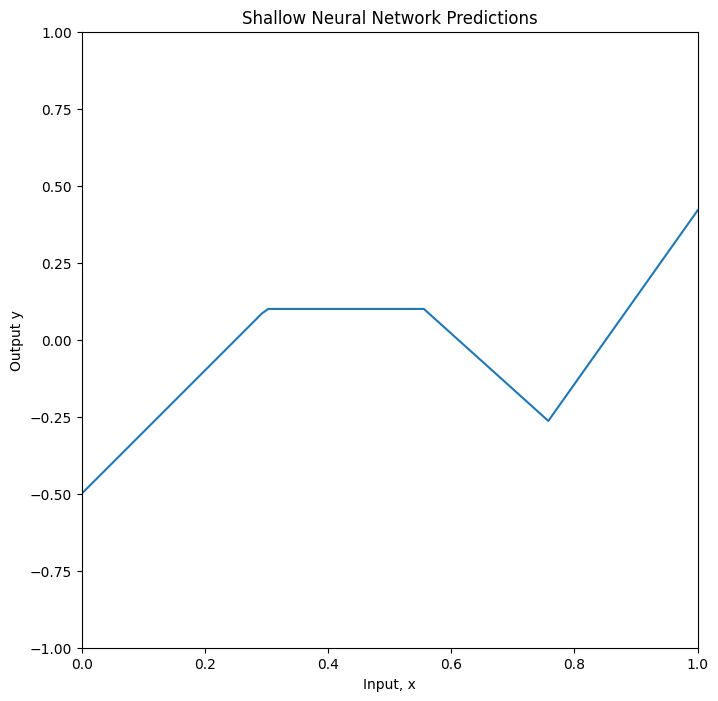

In [9]:
predictions = ShallowNN(sample,beta_0,omega_0,beta_1,omega_1)
PlotUnivariateRegression(sample,predictions,title="Shallow Neural Network Predictions")

**we'll implement the probability density function (PDF) for a normal distribution:**

In [36]:
# This function calculates the probability density of y under a normal distribution with mean mu and standard deviation sigma.
# It uses np.sqrt() for the square root, np.exp() for the exponential function, and np.pi for the constant π.
def NormalDistribution(value:np.ndarray,mu:int|float,sigma:int|float)->np.ndarray:
  prefactor = 1 / (sigma*np.sqrt(2*np.pi))
  exponent = -((value-mu)**2) / (2*sigma**2)
  probability = prefactor*np.exp(exponent)
  return probability

In [11]:
print(f"Correct: {0.119} --> Check: {NormalDistribution(1,-1,2.3)}")

Correct: 0.119 --> Check: 0.11884686185326672


In [12]:
yGauss = np.arange(-5,5,0.1)
mu = 0
sigma = 1.0
gaussProbability = NormalDistribution(yGauss,mu,sigma)

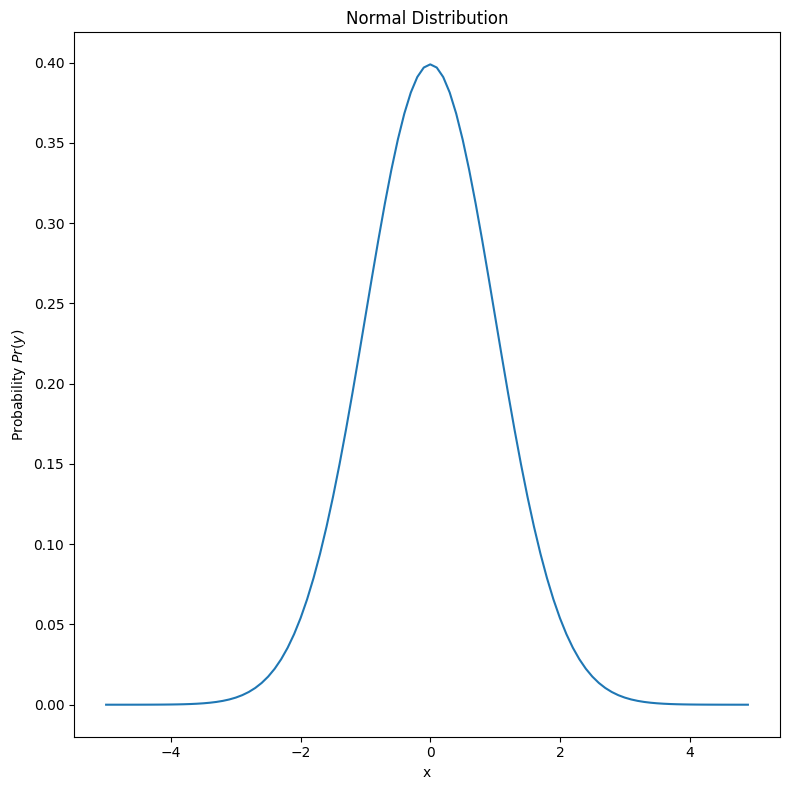

In [13]:
figure,axs = plt.subplots(figsize=(8,8))
axs.title.set_text("Normal Distribution")
axs.plot(yGauss,gaussProbability)
axs.set_xlabel("x")
axs.set_ylabel("Probability $Pr(y)$")
plt.tight_layout()
plt.show()

**compute the likelihood using this function:**

In [14]:
beta_0,omega_0,beta_1,omega_1 = GetParameters()

Shape of beta-0: (3, 1)
Shape of beta-1: (1, 1)
Shape of omega-0: (3, 1)
Shape of omega-1: (1, 3)


In [15]:
sample = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,
                   0.87168699,0.58858043])
groundTruth = np.array([-0.25934537,0.18195445,0.651270150,0.13921448,0.09366691,0.30567674,
                    0.372291170,0.20716968,-0.08131792,0.51187806,0.16943738,0.3994327,
                    0.019062570,0.55820410,0.452564960,-0.1183121,0.02957665,-1.24354444,
                    0.248038840,0.26824970])

In [31]:
print(f"Sample shape: {sample.shape}")
print(f"Ground Truth shape: {groundTruth.shape}")

Sample shape: (20,)
Ground Truth shape: (100,)


In [16]:
# This function calculates the likelihood by multiplying the probabilities of each individual data point under the normal distribution specified by mu and sigma
def ComputeLikelihood(groundTruth:np.ndarray,mu:int|float,sigma:int|float)->np.ndarray:
  probabilities = NormalDistribution(groundTruth,mu,sigma)
  # Compute the product of these probabilities
  likelihood = np.prod(probabilities)
  return likelihood

In [17]:
muPrediction = ShallowNN(sample,beta_0,omega_0,beta_1,omega_1)
sigma = 0.2

Data size: 20


In [18]:
likelihood = ComputeLikelihood(groundTruth,muPrediction,sigma)

In [19]:
print(f"Correct: {0.000010624} --> Check: {likelihood}")

Correct: 1.0624e-05 --> Check: 0.00012960477515535683


In [20]:
muValues = np.linspace(-1,1,100)
sigmaValues = np.linspace(0.5,1.5,100)

In [21]:
np.random.seed(0) # For reproducibility
groundTruth = np.random.normal(0,1,100) # 100 data points from a N(0,1) distribution
likelihoodBase = np.zeros((len(muValues),len(sigmaValues)))

In [22]:
print(f"Shape of Ground Truth: {groundTruth.shape}")
print(f"Likelihood shape: {likelihoodBase.shape}")

Shape of Ground Truth: (100,)
Likelihood shape: (100, 100)


In [23]:
for idx,mu in enumerate(muValues):
  for jdx,sigma in enumerate(sigmaValues):
    likelihoodBase[idx,jdx] = ComputeLikelihood(groundTruth,mu,sigma)

In [24]:
xMesh,yMesh = np.meshgrid(muValues,sigmaValues)
likeTranspose = likelihoodBase.T # Transpose to match the meshgrid orientation

In [25]:
print(f"Transpose likelihood shape: {likeTranspose.shape}")

Transpose likelihood shape: (100, 100)


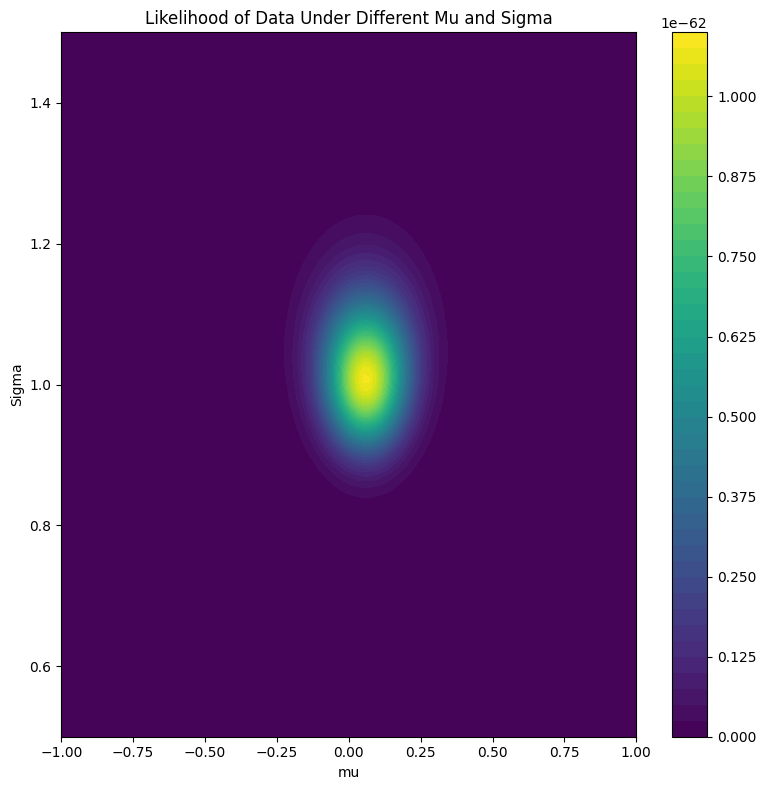

In [26]:
figure,axs = plt.subplots(figsize=(8,8))
cp = axs.contourf(xMesh,yMesh,likeTranspose,levels=45,cmap="viridis")
figure.colorbar(cp)
axs.set_title("Likelihood of Data Under Different Mu and Sigma")
axs.set_xlabel("mu")
axs.set_ylabel("Sigma")
plt.tight_layout()
plt.show()

**To compute the negative log likelihood of the data under the model without directly using a product, we leverage the properties of logarithms. The negative log likelihood (NLL) for a set of observations under a normal distribution can be derived from the probability density function (PDF) of the normal distribution.**

In [39]:
sample = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,
                   0.87168699,0.58858043])
groundTruth = np.array([-0.25934537,0.18195445,0.651270150,0.13921448,0.09366691,0.30567674,
                    0.372291170,0.20716968,-0.08131792,0.51187806,0.16943738,0.3994327,
                    0.019062570,0.55820410,0.452564960,-0.1183121,0.02957665,-1.24354444,
                    0.248038840,0.26824970])

In [40]:
def ComputeNegativeLikelihood(groundTruth:np.ndarray,mu:int|float,sigma:int|float)->np.ndarray:
  # Calculate the log of the normal distribution probability for each data point in groundTruth
  probabilities = NormalDistribution(groundTruth,mu,sigma)
  # Compute the negative sum of these log probabilities
  log = np.log(probabilities)
  nll = -np.sum(log)
  return nll

In [41]:
beta_0,omega_0,beta_1,omega_1 = GetParameters()

Shape of beta-0: (3, 1)
Shape of beta-1: (1, 1)
Shape of omega-0: (3, 1)
Shape of omega-1: (1, 3)


In [46]:
muPrediction = predictions = ShallowNN(sample,beta_0,omega_0,beta_1,omega_1)
print(f"Mu prediction shape: {muPrediction.shape}")
sigma = 0.2
negativelikehood = ComputeNegativeLikelihood(groundTruth,muPrediction,sigma)

Data size: 20
Mu prediction shape: (1, 20)


In [47]:
print(f"Correct: 11.452419564 --> Check: {negativelikehood}")

Correct: 11.452419564 --> Check: 8.95102092939033


In [45]:
def ComputeSumofSquares(groundTruth:np.ndarray,predictions:np.ndarray)->np.ndarray:
  # Compute the sum of squared distances between groundTruth and predictions
  sumsquared = np.sum((groundTruth-predictions)**2)
  return sumsquared

In [48]:
computedSquared = ComputeSumofSquares(groundTruth,predictions)

In [49]:
print(f"Correct: 2.020992572 --> Check: {computedSquared}")

Correct: 2.020992572 --> Check: 1.8208806811183111


**maximum likelihood / minimum negative log likelihood / least squares solution**:

In [76]:
betaValues_1 = np.arange(0,1.0,0.01) # Define a range of values for the parameter
print(f"Beta Values shape: {betaValues_1.shape}")

Beta Values shape: (100,)


In [77]:
likelihoods = np.zeros_like(betaValues_1)
print(f"Likelihoods shape: {likelihoods.shape}")

Likelihoods shape: (100,)


In [78]:
negetiveLikelihoods = np.zeros_like(betaValues_1)
print(f"Negative-Likelihoods shape: {negetiveLikelihoods.shape}")

Negative-Likelihoods shape: (100,)


In [79]:
sumSquared = np.zeros_like(betaValues_1)
print(f"Squared Sum shape: {sumSquared.shape}")

Squared Sum shape: (100,)


In [80]:
beta_0,omega_0,beta_1,omega_1 = GetParameters()

Shape of beta-0: (3, 1)
Shape of beta-1: (1, 1)
Shape of omega-0: (3, 1)
Shape of omega-1: (1, 3)


In [81]:
sigma = 0.2

In [82]:
sampleModel = np.arange(0,1,0.01)

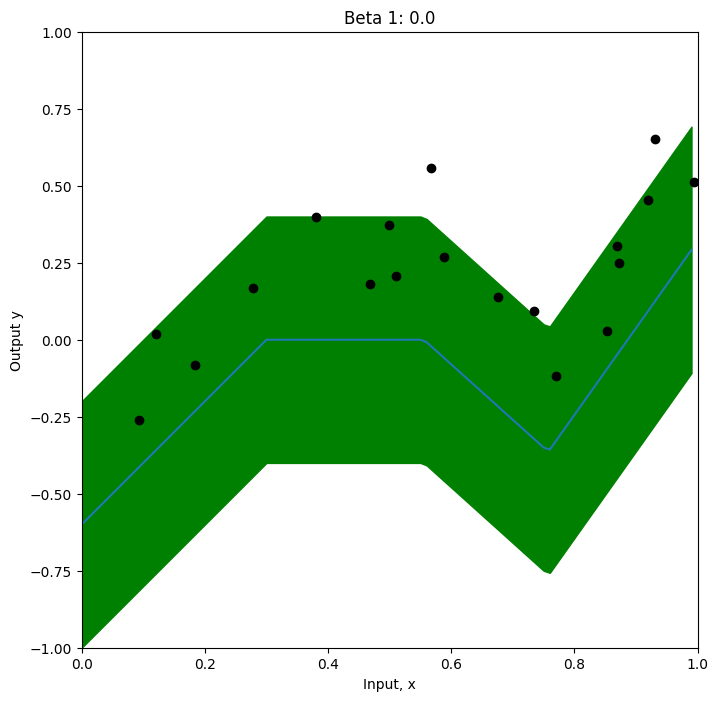

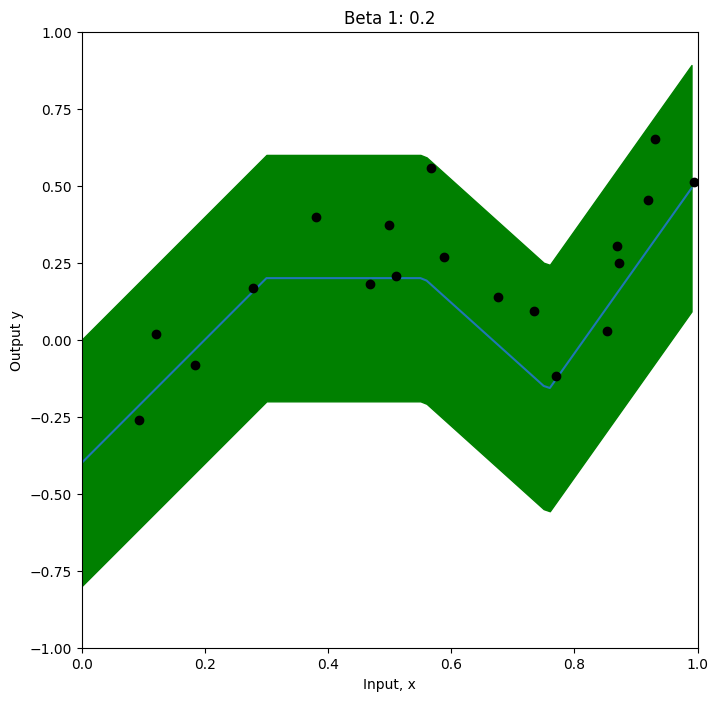

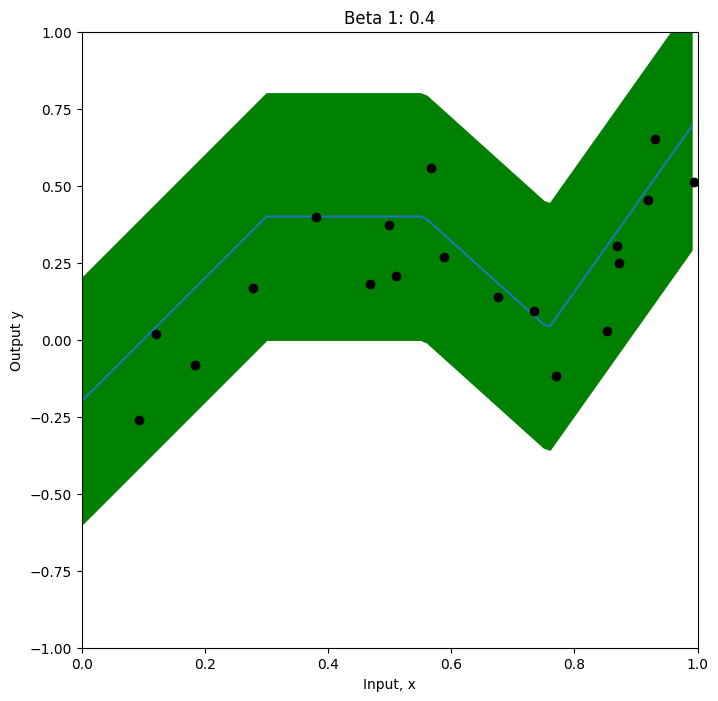

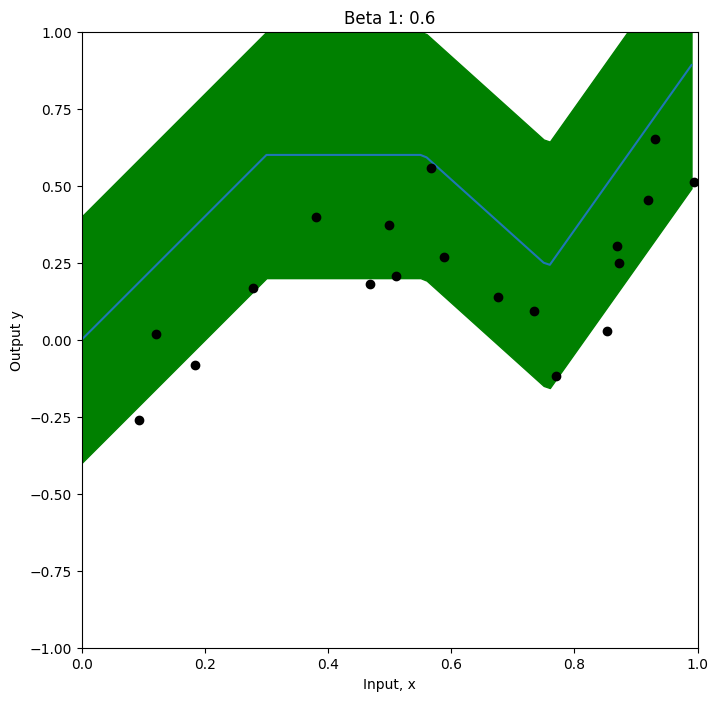

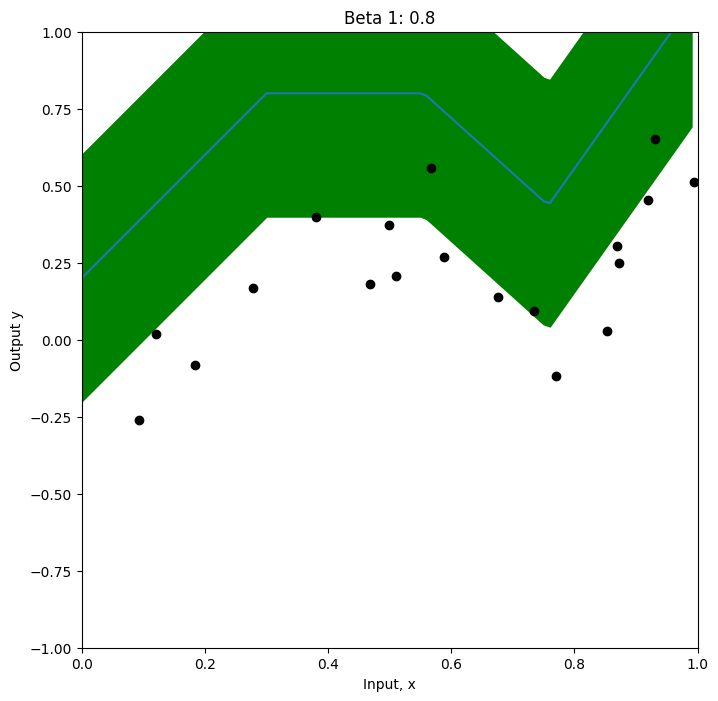

In [83]:
for c in range(len(betaValues_1)):
  beta_1[0,0] = betaValues_1[c]
  muPrediction = predictions = ShallowNN(sample,beta_0,omega_0,beta_1,omega_1)
  likelihoods[c] = ComputeLikelihood(groundTruth,muPrediction,sigma)
  negetiveLikelihoods[c] = ComputeNegativeLikelihood(groundTruth,muPrediction,sigma)
  sumSquared[c] = ComputeSumofSquares(groundTruth,predictions)
  if c % 20 == 0:
    # Run the model to get values to plot and plot it
    yModel = ShallowNN(sampleModel,beta_0,omega_0,beta_1,omega_1)
    PlotUnivariateRegression(sampleModel,yModel,sample,groundTruth,sigmaModel=sigma,title=f"Beta 1: {beta_1[0,0]}")

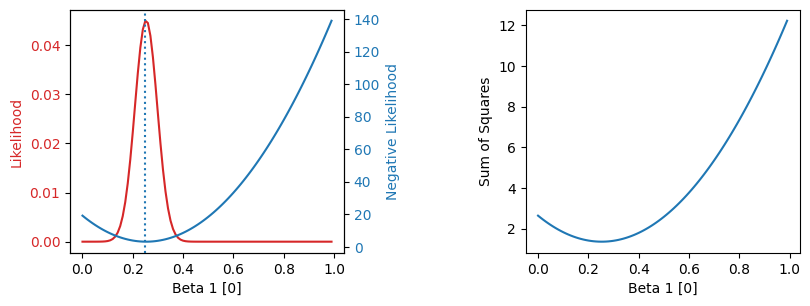

In [85]:
figure,axs = plt.subplots(1,2,figsize=(8,8))
figure.set_size_inches(10.5,5.5)
figure.tight_layout(pad=10.0)
likelihoodColor = "tab:red"
negativeLikelihoodColor = "tab:blue"
axs[0].set_xlabel("Beta 1 [0]")
axs[0].set_ylabel("Likelihood",color=likelihoodColor)
axs[0].plot(betaValues_1,likelihoods,color=likelihoodColor)
axs[0].tick_params(axis="y",labelcolor=likelihoodColor)
ax00 = axs[0].twinx()
ax00.plot(betaValues_1,negetiveLikelihoods,color=negativeLikelihoodColor)
ax00.set_ylabel("Negative Likelihood",color=negativeLikelihoodColor)
ax00.tick_params(axis="y",labelcolor=negativeLikelihoodColor)
plt.axvline(x=betaValues_1[np.argmax(likelihoods)],linestyle="dotted")
axs[1].plot(betaValues_1,sumSquared)
axs[1].set_xlabel("Beta 1 [0]")
axs[1].set_ylabel("Sum of Squares")
plt.show()

In [86]:
print(f"Maximum Likelihood: {likelihoods[np.argmax(likelihoods)]} at Beta 1: {betaValues_1[np.argmax(likelihoods)]}")
print(f"Maximum Negative-Likelihood: {negetiveLikelihoods[np.argmax(negetiveLikelihoods)]} at Beta 1: {betaValues_1[np.argmax(negetiveLikelihoods)]}")
print(f"Least Squares: {sumSquared[np.argmax(sumSquared)]} at Beta 1: {betaValues_1[np.argmax(sumSquared)]}")

Maximum Likelihood: 0.04496043638416425 at Beta 1: 0.25
Maximum Negative-Likelihood: 138.8966661281903 at Beta 1: 0.99
Least Squares: 12.216532297022313 at Beta 1: 0.99
